In [1]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM, Input
from keras.losses import MeanSquaredError
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
plt.style.use('fivethirtyeight')

In [2]:
import yfinance as yfin

In [3]:
# Download the data
df = yfin.download('AAPL', start='2012-01-01', end='2019-12-17')

# Display the data
print(df)

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.416984  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.483717  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.622306  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.754257  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.734029  394024400
...               ...        ...        ...        ...        ...        ...
2019-12-10  67.150002  67.517502  66.464996  67.120003  65.218674   90420400
2019-12-11  67.202499  67.775002  67.125000  67.692497  65.774933   78756800
2019-12-12  66.945000  68.139999  66.830002  67.864998  65.942551  137310400
2019-12-13  67.864998  68.824997  67.732498  68.787498  66.838928  133587600
2019-12-16  69.250000  70.197502  69.245003  69.964996  67.983070  128186000

In [4]:
df.shape

(2002, 6)

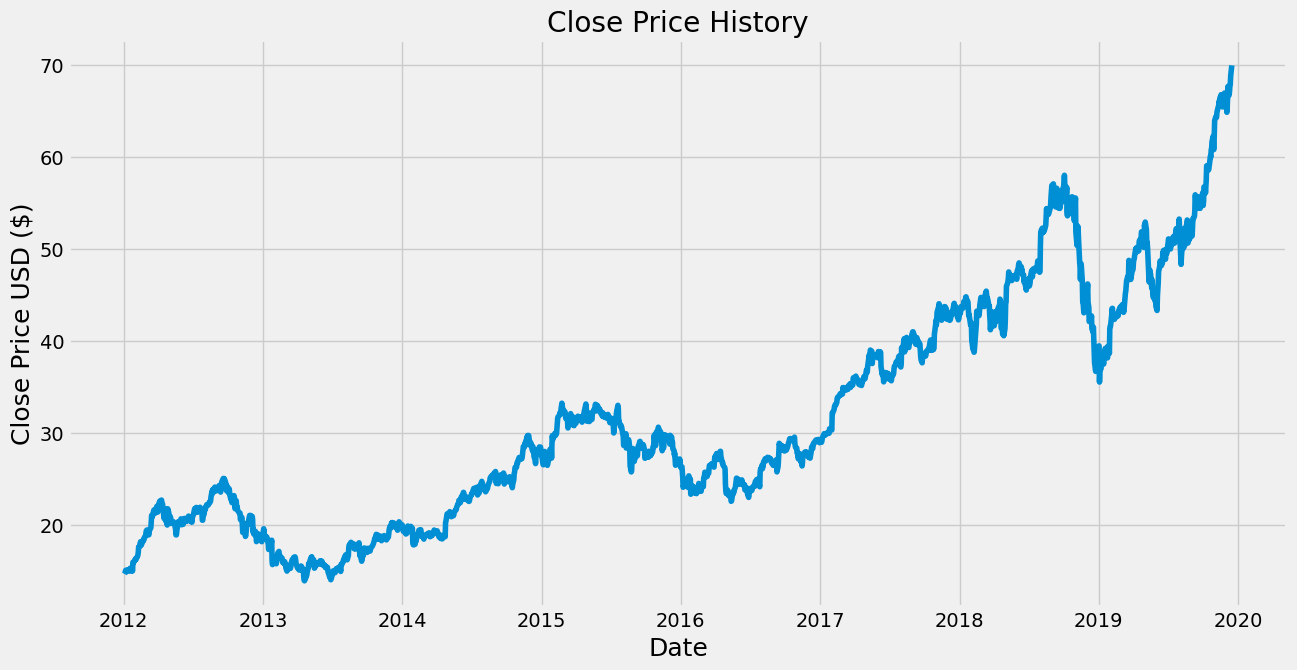

In [5]:
# Plotting the close price history
plt.figure(figsize=(14, 7))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Create a dataframe with only the closing price 
data = df.filter(['Close'])
# Convert our Dataframe into numpy array
dataset = data.values
# Get the number of rows needed to train the model
training_data_len = math.ceil(len(dataset)* 0.8 )
training_data_len

1602

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [8]:
# Create the traing data set
# Create the Scaled traing data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data set
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.0189

In [9]:
# Convert the x_train and y_train into the numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1542, 60, 1)

In [11]:
# Build the LSTM Model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss=MeanSquaredError())

In [13]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1542/1542 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - loss: 0.0015


In [14]:
# Create the testing data set
# Create a new array containg the scaled values from index 1542 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: ,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [15]:
# Convert the data into a numpy array
x_test = np.array(x_test)

In [16]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [17]:
# Get the model predicted price value
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step


In [18]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((prediction - y_test)**2)))
rmse

1.3352767889034864

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1728\575600194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


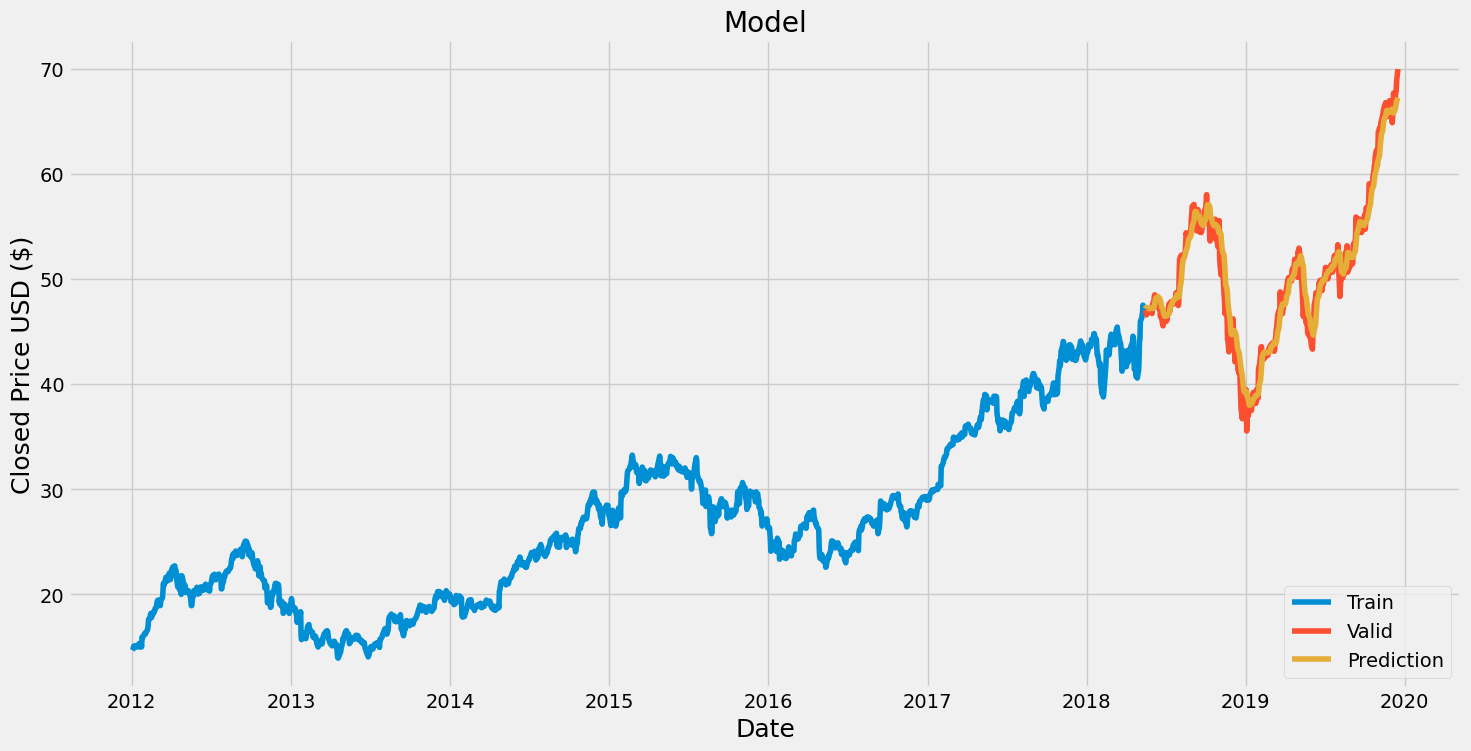

In [19]:
# PLot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = prediction
# Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closed Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Prediction'], loc = 'lower right')
plt.show()

In [20]:
# show the valid and predicted price
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,47.166901
2018-05-17,46.747501,47.275318
2018-05-18,46.577499,47.297668
2018-05-21,46.907501,47.251064
2018-05-22,46.790001,47.218143
...,...,...
2019-12-10,67.120003,66.174538
2019-12-11,67.692497,66.363297
2019-12-12,67.864998,66.610764


In [21]:
# Get the quote
apple_quote = yfin.download('AAPL', start='2012-01-01', end='2019-12-17')
# Create a new data frame
new_df = apple_quote.filter(['Close'])
# Get the last 60 days closing price value and convert the data into an array
last_60days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60days_scaled = scaler.transform(last_60days)
# Create an empty list
X_test = []
#Append the last 60 days
X_test.append(last_60days_scaled)
# Convert the data into numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[67.74179]]


In [22]:
# Get the quote
apple_quote2 = yfin.download('AAPL', start='2019-12-18', end='2019-12-19')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2019-12-18    69.934998
Name: Close, dtype: float64
